In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

df = pd.read_csv("Titanic.csv")

df = df.drop_duplicates()

df = df[df["Fare"].notna()].copy()

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = {"Fare", "PassengerId", "Survived"}
X_cols = [c for c in numeric_cols if c not in exclude_cols]

simple_feature = "Age" if "Age" in X_cols else X_cols[0]
print("Using feature:", simple_feature)

X = df[[simple_feature]].copy()
y = df["Fare"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Using feature: Age


In [42]:
# Data Cleaning (NAs)
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)


In [43]:
# Manual Simple Linear Regression
X_design = np.c_[np.ones((X_train_imp.shape[0], 1)), X_train_imp]
theta = np.linalg.pinv(X_design.T @ X_design) @ (X_design.T @ y_train.values.reshape(-1, 1))

intercept_manual = float(theta[0, 0])
coef_manual = float(theta[1, 0])

print("Intercept:", intercept_manual)
print("Coefficient:", coef_manual)


Intercept: 22.012850006571785
Coefficient: 0.3620524357953494


In [44]:
# Predictions + Evaluation
y_pred_test = intercept_manual + coef_manual * X_test_imp.reshape(-1)

mse = mean_squared_error(y_test, y_pred_test)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 1524.6365182168759
RMSE: 39.04659419484465
R²: 0.014729652921299241


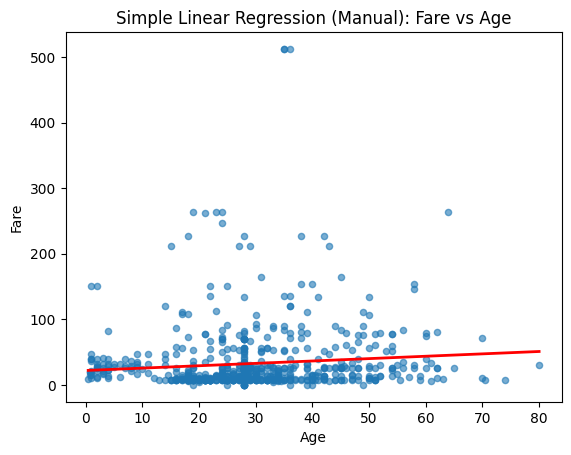

In [45]:
# Plot: Regression Line
plt.scatter(X_train_imp, y_train, s=20, alpha=0.6)
x_line = np.linspace(X_train_imp.min(), X_train_imp.max(), 200)
y_line = intercept_manual + coef_manual * x_line
plt.plot(x_line, y_line, color="red", linewidth=2)

plt.xlabel(simple_feature)
plt.ylabel("Fare")
plt.title(f"Simple Linear Regression (Manual): Fare vs {simple_feature}")
plt.show()


In [46]:
# Select Multiple Features
features = ["Pclass", "Age", "SibSp", "Parch"]
X = df[features].copy()
y = df["Fare"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train_imp, y_train)

print("Intercept:", mlr.intercept_)
print("Coefficients:", mlr.coef_)
print("Feature order:", features)


Intercept: 113.75053411107669
Coefficients: [-36.026115    -0.14932034   5.25609272  11.15681942]
Feature order: ['Pclass', 'Age', 'SibSp', 'Parch']


In [47]:
#  Evaluate Model
y_pred_test = mlr.predict(X_test_imp)

mse = mean_squared_error(y_test, y_pred_test)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 946.3355043476649
RMSE: 30.762566608585587
R²: 0.3884468201561928


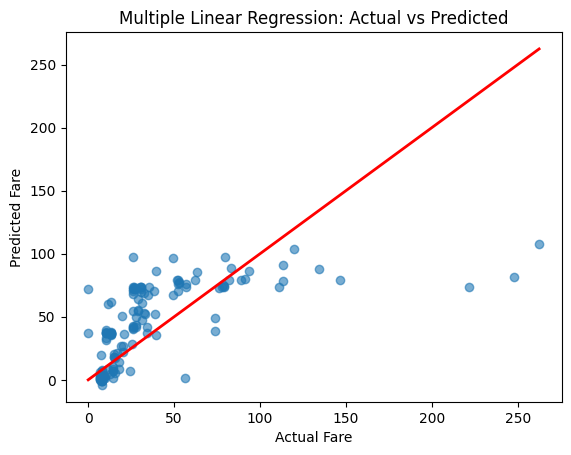

In [48]:
# Plot: Actual vs Predicted Fares
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linewidth=2)  # reference line
plt.show()


In [49]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly_feature = "Age"
X = df[[poly_feature]].copy()
y = df["Fare"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# Create polynomial features (degree=2 for quadratic)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imp)
X_test_poly = poly.transform(X_test_imp)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)


Intercept: 28.181181717191073
Coefficients: [-0.10337653  0.00726536]


In [50]:
# Evaluate Polynomial Regression
y_pred_test = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_test)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 1518.6140071881553
RMSE: 38.969398342650294
R²: 0.018621597959118996


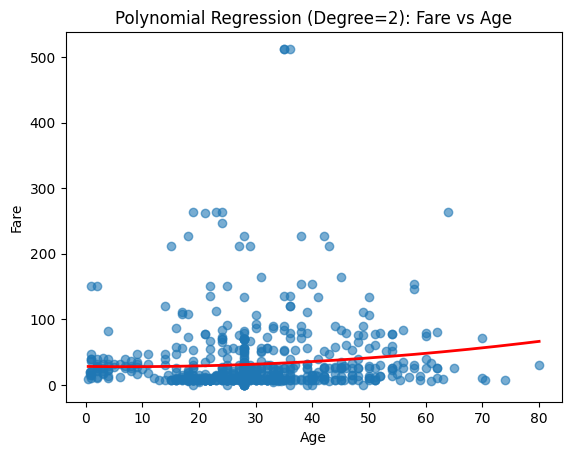

In [51]:
plt.scatter(X_train_imp, y_train, alpha=0.6)

x_line = np.linspace(X_train_imp.min(), X_train_imp.max(), 200).reshape(-1, 1)
x_line_poly = poly.transform(x_line)
y_line = poly_reg.predict(x_line_poly)

plt.plot(x_line, y_line, color="red", linewidth=2)
plt.xlabel(poly_feature)
plt.ylabel("Fare")
plt.title(f"Polynomial Regression (Degree=2): Fare vs {poly_feature}")
plt.show()


In [64]:
# Simple Linear Regression (Manual)
y_pred_simple = intercept_manual + coef_manual * X_test_imp.reshape(-1)
simple_mse = mean_squared_error(y_test, y_pred_simple)
simple_rmse = np.sqrt(simple_mse)
simple_r2 = r2_score(y_test, y_pred_simple)

# Plot & Save (Simple Regression)
plt.scatter(X_test_imp, y_test, alpha=0.6, label="Actual")
plt.plot(X_test_imp, y_pred_simple, color="red", linewidth=2, label="Prediction")
plt.xlabel(simple_feature)
plt.ylabel("Fare")
plt.title(f"Simple Linear Regression (Manual): Fare vs {simple_feature}")
plt.legend()
plt.savefig("plot_simple_regression.png", dpi=300, bbox_inches="tight")
plt.close()

# Multiple Linear Regression (sklearn)
features = ["Pclass", "Age", "SibSp", "Parch"]
X_mlr = df[features].copy()
y_mlr = df["Fare"].copy()

X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(
    X_mlr, y_mlr, test_size=0.2, random_state=42
)

imputer_mlr = SimpleImputer(strategy="median")
X_train_mlr_imp = imputer_mlr.fit_transform(X_train_mlr)
X_test_mlr_imp = imputer_mlr.transform(X_test_mlr)

mlr = LinearRegression()
mlr.fit(X_train_mlr_imp, y_train_mlr)

y_pred_mlr = mlr.predict(X_test_mlr_imp)
mlr_mse = mean_squared_error(y_test_mlr, y_pred_mlr)
mlr_rmse = np.sqrt(mlr_mse)
mlr_r2 = r2_score(y_test_mlr, y_pred_mlr)

# Plot & Save (MLR)
plt.scatter(y_test_mlr, y_pred_mlr, alpha=0.6)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.plot([0, max(y_test_mlr)], [0, max(y_test_mlr)], color="red", linewidth=2)
plt.savefig("plot_multiple_regression.png", dpi=300, bbox_inches="tight")
plt.close()

# Polynomial Regression (deg=2)
y_pred_poly = poly_reg.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, y_pred_poly)

# Plot & Save (Polynomial Regression)
plt.scatter(X_test_imp, y_test, alpha=0.6, label="Actual")
x_line = np.linspace(X_test_imp.min(), X_test_imp.max(), 200).reshape(-1, 1)
x_line_poly = poly.transform(x_line)
y_line = poly_reg.predict(x_line_poly)
plt.plot(x_line, y_line, color="red", linewidth=2, label="Prediction")
plt.xlabel(poly_feature)
plt.ylabel("Fare")
plt.title(f"Polynomial Regression (Degree=2): Fare vs {poly_feature}")
plt.legend()
plt.savefig("plot_polynomial_regression.png", dpi=300, bbox_inches="tight")
plt.close()

results = [
    ["Simple Linear Regression (Manual)", simple_mse, simple_rmse, simple_r2],
    ["Multiple Linear Regression (sklearn)", mlr_mse, mlr_rmse, mlr_r2],
    ["Polynomial Regression (deg=2)", poly_mse, poly_rmse, poly_r2],
]

results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R²"])
print(results_df)

results_df.to_csv("regression_results.csv", index=False)

plt.bar(results_df["Model"], results_df["R²"], color=["blue", "green", "purple"])
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=20)
plt.savefig("plot_model_comparison.png", dpi=300, bbox_inches="tight")
plt.close()


                                  Model          MSE       RMSE        R²
0     Simple Linear Regression (Manual)  1524.636518  39.046594  0.014730
1  Multiple Linear Regression (sklearn)   946.335504  30.762567  0.388447
2         Polynomial Regression (deg=2)  1518.614007  38.969398  0.018622
